### Pandas

#### Importing Library

In [151]:
import pandas as pd

In [152]:
# help(pd)

#### Getting

In [153]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')

In [154]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [155]:
df=df.drop(['species'], axis=1)

In [156]:
df= df.drop(['island'], axis=1)

In [157]:
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [158]:
df=df.rename(columns = {'bill_length_mm':'L', 'bill_depth_mm':'D','flipper_length_mm':'L1','body_mass_g':'M','sex':'Gender'})

In [159]:
df.to_csv('ML3Data.csv', index=False)

In [160]:
df1 = pd.read_csv('ML3Data.csv')

In [161]:
df1.head()

,L,D,L1,M,Gender
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [162]:
df1.shape

(344, 5)

In [163]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
L,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
D,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
L1,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
M,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [164]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   L       342 non-null    float64
 1   D       342 non-null    float64
 2   L1      342 non-null    float64
 3   M       342 non-null    float64
 4   Gender  333 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [165]:
df1.groupby('Gender').size()

Gender
FEMALE    165
MALE      168
dtype: int64

In [166]:
df1.groupby('Gender').mean()

,L,D,L1,M
Gender,,,,
FEMALE,42.096970,16.425455,197.363636,3862.272727
MALE,45.854762,17.891071,204.505952,4545.684524


#### Data Visualization

In [167]:
# https://www.w3schools.com/python/matplotlib_intro.asp
import matplotlib.pyplot as plt

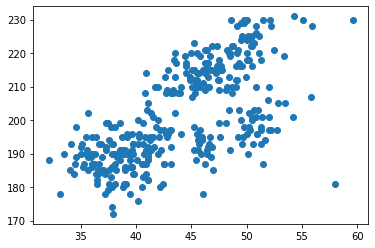

In [168]:
plt.scatter(df1['L'],df1['L1'])
plt.show()

#### Data Preprocessing

In [169]:
df1.head()

,L,D,L1,M,Gender
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [170]:
df1.shape

(344, 5)

In [171]:
df1=df1.dropna()

In [172]:
df1.head()

,L,D,L1,M,Gender
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [173]:
df1.shape

(333, 5)

#### Construction Model, Evaluating model and using Model for Prediction

In [174]:
# Importing metrics for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [175]:
# Seperating the data into dependent and independent variables
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

In [176]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [177]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [178]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

      FEMALE       0.87      0.98      0.92        41
        MALE       0.95      0.77      0.85        26

    accuracy                           0.90        67
   macro avg       0.91      0.87      0.89        67
weighted avg       0.90      0.90      0.89        67

[[40  1]
 [ 6 20]]


In [179]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.8955223880597015


In [180]:
df1.head()

,L,D,L1,M,Gender
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [181]:
# Prediction for user input
a= float(input("Enter length1: "))
b= float (input("Enter depth: "))
c= float(input("Enter length2: "))
d= float(input("Enter mass: "))
array=[[a,b,c,d]]
print("Based on your input Category is: ", classifier.predict(array))

Enter length1:  36
Enter depth:  19
Enter length2:  193
Enter mass:  3450


Based on your input Category is:  ['FEMALE']


In [182]:
## Prediction for user input
a= float(input("Enter length1: "))
b= float (input("Enter depth: "))
c= float(input("Enter length2: "))
d= float(input("Enter mass: "))
npArray=[[a,b,c,d]]
print("Based on your input Category is: ", classifier.predict(npArray))

Enter length1:  23
Enter depth:  4352
Enter length2:  134
Enter mass:  1343


Based on your input Category is:  ['MALE']


#### References
1. https://www.geeksforgeeks.org/pandas-tutorial/
2. https://www.tutorialspoint.com/python_pandas/index.htm
3. https://www.javatpoint.com/python-pandas
4. https://www.kaggle.com/learn/pandas
5. https://www.datacamp.com/tutorial/pandas
6. https://pandas.pydata.org/
7. https://realpython.com/pandas-dataframe/
8. https://www.datacamp.com/tutorial/naive-bayes-scikit-learn



#### Saving Constructed model for future use
##### 1. Save Your Model with pickle
##### 2. Save Your Model with joblib

In [183]:
import pickle

In [184]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [185]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8955223880597015


In [186]:
import joblib
# save the model to disk
filename = 'finalized_model1.sav'
joblib.dump(classifier, filename)

['finalized_model1.sav']

In [187]:
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.8955223880597015
